In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sb
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tweet1 = pd.read_csv("tweets_2019_lite.csv",lineterminator='\n')
tweet1.head()

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count
0,1080847344629878785,2019-01-03 15:24:22+00:00,"@camilawondcr Sim. E quem merece sobressair, v...",889152311704113152,ImMummRa,Яамои #HenryCavillSuperman,2017-07-23 15:56:45+00:00,DC - Marvel - Star Wars - The Dragon Prince (R...,http://pbs.twimg.com/profile_images/1209899835...,https://pbs.twimg.com/profile_banners/88915231...,NaN,13946,668,541
1,1080845616920625152,2019-01-03 15:17:30+00:00,@k_rad @DVATW With abusive women like amber h...,990205643532521472,anike34t,anike34t,2018-04-28 12:26:37+00:00,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,187,1,0
2,1080845503305342977,2019-01-03 15:17:03+00:00,"Primer Jueves del Año!! #FelizJueves!\nAl ""Hav...",2482498394,VistarMagazine,Vistar Magazine,2014-05-07 17:23:35+00:00,Twitter oficial de Vistar Magazine. Reflejamos...,http://pbs.twimg.com/profile_images/1385584253...,https://pbs.twimg.com/profile_banners/24824983...,https://t.co/MRIcyRTvWM,3037,2410,482
3,1080844507501846530,2019-01-03 15:13:06+00:00,"""I Was Petrified of the Monster"": Johnny Depp,...",43758124,THREsq,THR Esq.,2009-05-31 21:20:11+00:00,Entertainment law news and comment from The Ho...,http://pbs.twimg.com/profile_images/5839853005...,NaN,http://t.co/aOrsEZkxFC,8346,16735,354
4,1080844257844449283,2019-01-03 15:12:06+00:00,"Johnny Depp, Amber Heard Legal Documents Shed ...",3317756286,EntMediaNews,Nigel Guest,2015-08-17 14:07:34+00:00,NaN,http://pbs.twimg.com/profile_images/6333688730...,NaN,NaN,118806,81,5


In [4]:
tweet1["user.created_at"] = tweet1["user.created_at"].astype(str).str.split("+").str[0]
tweet1["created_at"] = tweet1["created_at"].astype(str).str.split("+").str[0]

In [5]:
my_format = '%Y-%m-%d %H:%M:%S'
tweet1['user.created_at'] = pd.to_datetime(tweet1['user.created_at'], format=my_format)
tweet1['created_at'] = pd.to_datetime(tweet1['created_at'], format=my_format)

In [6]:
tweet1['diff'] = abs(tweet1['user.created_at'] - tweet1['created_at'])
tweet1

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,diff
0,1080847344629878785,2019-01-03 15:24:22,"@camilawondcr Sim. E quem merece sobressair, v...",889152311704113152,ImMummRa,Яамои #HenryCavillSuperman,2017-07-23 15:56:45,DC - Marvel - Star Wars - The Dragon Prince (R...,http://pbs.twimg.com/profile_images/1209899835...,https://pbs.twimg.com/profile_banners/88915231...,NaN,13946,668,541,528 days 23:27:37
1,1080845616920625152,2019-01-03 15:17:30,@k_rad @DVATW With abusive women like amber h...,990205643532521472,anike34t,anike34t,2018-04-28 12:26:37,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,187,1,0,250 days 02:50:53
2,1080845503305342977,2019-01-03 15:17:03,"Primer Jueves del Año!! #FelizJueves!\nAl ""Hav...",2482498394,VistarMagazine,Vistar Magazine,2014-05-07 17:23:35,Twitter oficial de Vistar Magazine. Reflejamos...,http://pbs.twimg.com/profile_images/1385584253...,https://pbs.twimg.com/profile_banners/24824983...,https://t.co/MRIcyRTvWM,3037,2410,482,1701 days 21:53:28
3,1080844507501846530,2019-01-03 15:13:06,"""I Was Petrified of the Monster"": Johnny Depp,...",43758124,THREsq,THR Esq.,2009-05-31 21:20:11,Entertainment law news and comment from The Ho...,http://pbs.twimg.com/profile_images/5839853005...,NaN,http://t.co/aOrsEZkxFC,8346,16735,354,3503 days 17:52:55
4,1080844257844449283,2019-01-03 15:12:06,"Johnny Depp, Amber Heard Legal Documents Shed ...",3317756286,EntMediaNews,Nigel Guest,2015-08-17 14:07:34,NaN,http://pbs.twimg.com/profile_images/6333688730...,NaN,NaN,118806,81,5,1235 days 01:04:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94341,1204114101737336833,2019-12-09 19:02:27,Amber Heard https://t.co/EB64SipBiF https://t....,1023908146006421504,Hollyantra,Beautiful Hollywood,2018-07-30 12:28:20,NaN,http://pbs.twimg.com/profile_images/1023909265...,NaN,NaN,19677,119,4,497 days 06:34:07
94342,1204111817489952768,2019-12-09 18:53:23,Amber Heard https://t.co/BUI140zTLj,479610523,GentIemanLadies,Gentleman's Ladies,2012-01-31 15:33:07,Pictures of your favorite women ♥\nStay Classy!,http://pbs.twimg.com/profile_images/1252762363...,https://pbs.twimg.com/profile_banners/47961052...,https://t.co/IEe9i8FFna,65158,86273,0,2869 days 03:20:16
94343,1204106778578956288,2019-12-09 18:33:21,Cuando los de DC decidieron juntar en el casti...,701861226352087045,Harley_RatedR,E 🏳️‍🌈,2016-02-22 20:08:51,"It's all just a cosmic joke 🏳️‍🌈 Ay amore, la ...",http://pbs.twimg.com/profile_images/1258042834...,https://pbs.twimg.com/profile_banners/70186122...,NaN,73291,432,140,1385 days 22:24:30
94344,1204105029411586051,2019-12-09 18:26:24,Amber Heard #GentlemanBonner https://t.co/N1cJ...,4149920184,dudestuffSFW,Gentelman Boner,2015-11-06 21:11:12,NaN,http://pbs.twimg.com/profile_images/6627456057...,NaN,NaN,47834,3972,0,1493 days 21:15:12


In [7]:
tweet1["days"] = tweet1["diff"].astype(str).str.split(" ").str[0]
tweet1["hours"] = tweet1["diff"].astype(str).str.split(" ").str[2]
tweet1.drop(['diff'], axis=1, inplace=True)

In [8]:
def tweet_usr_date_time(df):
    df['tweet_date'] = df.created_at.astype(str).str.split(" ").str[0]
    df['tweet_time'] = df.created_at.astype(str).str.split(" ").str[1]
    df['user_create_date'] = df["user.created_at"].astype(str).str.split(" ").str[0]
    df['user_create_time'] = df["user.created_at"].astype(str).str.split(" ").str[1]
    df = df.reset_index(drop=True)
    return df
tweet_usr_date_time(tweet1)

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time
0,1080847344629878785,2019-01-03 15:24:22,"@camilawondcr Sim. E quem merece sobressair, v...",889152311704113152,ImMummRa,Яамои #HenryCavillSuperman,2017-07-23 15:56:45,DC - Marvel - Star Wars - The Dragon Prince (R...,http://pbs.twimg.com/profile_images/1209899835...,https://pbs.twimg.com/profile_banners/88915231...,NaN,13946,668,541,528,23:27:37.000000000,2019-01-03,15:24:22,2017-07-23,15:56:45
1,1080845616920625152,2019-01-03 15:17:30,@k_rad @DVATW With abusive women like amber h...,990205643532521472,anike34t,anike34t,2018-04-28 12:26:37,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,187,1,0,250,02:50:53.000000000,2019-01-03,15:17:30,2018-04-28,12:26:37
2,1080845503305342977,2019-01-03 15:17:03,"Primer Jueves del Año!! #FelizJueves!\nAl ""Hav...",2482498394,VistarMagazine,Vistar Magazine,2014-05-07 17:23:35,Twitter oficial de Vistar Magazine. Reflejamos...,http://pbs.twimg.com/profile_images/1385584253...,https://pbs.twimg.com/profile_banners/24824983...,https://t.co/MRIcyRTvWM,3037,2410,482,1701,21:53:28.000000000,2019-01-03,15:17:03,2014-05-07,17:23:35
3,1080844507501846530,2019-01-03 15:13:06,"""I Was Petrified of the Monster"": Johnny Depp,...",43758124,THREsq,THR Esq.,2009-05-31 21:20:11,Entertainment law news and comment from The Ho...,http://pbs.twimg.com/profile_images/5839853005...,NaN,http://t.co/aOrsEZkxFC,8346,16735,354,3503,17:52:55.000000000,2019-01-03,15:13:06,2009-05-31,21:20:11
4,1080844257844449283,2019-01-03 15:12:06,"Johnny Depp, Amber Heard Legal Documents Shed ...",3317756286,EntMediaNews,Nigel Guest,2015-08-17 14:07:34,NaN,http://pbs.twimg.com/profile_images/6333688730...,NaN,NaN,118806,81,5,1235,01:04:32.000000000,2019-01-03,15:12:06,2015-08-17,14:07:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94341,1204114101737336833,2019-12-09 19:02:27,Amber Heard https://t.co/EB64SipBiF https://t....,1023908146006421504,Hollyantra,Beautiful Hollywood,2018-07-30 12:28:20,NaN,http://pbs.twimg.com/profile_images/1023909265...,NaN,NaN,19677,119,4,497,06:34:07.000000000,2019-12-09,19:02:27,2018-07-30,12:28:20
94342,1204111817489952768,2019-12-09 18:53:23,Amber Heard https://t.co/BUI140zTLj,479610523,GentIemanLadies,Gentleman's Ladies,2012-01-31 15:33:07,Pictures of your favorite women ♥\nStay Classy!,http://pbs.twimg.com/profile_images/1252762363...,https://pbs.twimg.com/profile_banners/47961052...,https://t.co/IEe9i8FFna,65158,86273,0,2869,03:20:16.000000000,2019-12-09,18:53:23,2012-01-31,15:33:07
94343,1204106778578956288,2019-12-09 18:33:21,Cuando los de DC decidieron juntar en el casti...,701861226352087045,Harley_RatedR,E 🏳️‍🌈,2016-02-22 20:08:51,"It's all just a cosmic joke 🏳️‍🌈 Ay amore, la ...",http://pbs.twimg.com/profile_images/1258042834...,https://pbs.twimg.com/profile_banners/70186122...,NaN,73291,432,140,1385,22:24:30.000000000,2019-12-09,18:33:21,2016-02-22,20:08:51
94344,1204105029411586051,2019-12-09 18:26:24,Amber Heard #GentlemanBonner https://t.co/N1cJ...,4149920184,dudestuffSFW,Gentelman Boner,2015-11-06 21:11:12,NaN,http://pbs.twimg.com/profile_images/6627456057...,NaN,NaN,47834,3972,0,1493,21:15:12.000000000,2019-12-09,18:26:24,2015-11-06,21:11:12


In [9]:
drop_list = ['user.created_at','created_at']
def y_m_d(df):
    df['tweet_date'] = pd.to_datetime(df['tweet_date'])
    df['tweet_year'] = (df.tweet_date.dt.strftime('%Y')).astype('int')
#     df['tweet_day'] = df.tweet_date.dt.strftime('%A')
    df['tweet_month'] = df.tweet_date.dt.strftime('%B')
    
    df['user_create_date'] = pd.to_datetime(df['user_create_date'])
    df['usr_year'] = (df.user_create_date.dt.strftime('%Y')).astype('int')
#     df['usr_day'] = df.user_create_date.dt.strftime('%A')
    df['usr_month'] = df.user_create_date.dt.strftime('%B')
    
    df.drop(drop_list, axis=1, inplace=True)
    return df
y_m_d(tweet1)

,id_str,full_text,user.id_str,user.screen_name,user.name,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,...,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
0,1080847344629878785,"@camilawondcr Sim. E quem merece sobressair, v...",889152311704113152,ImMummRa,Яамои #HenryCavillSuperman,DC - Marvel - Star Wars - The Dragon Prince (R...,http://pbs.twimg.com/profile_images/1209899835...,https://pbs.twimg.com/profile_banners/88915231...,NaN,13946,...,528,23:27:37.000000000,2019-01-03,15:24:22,2017-07-23,15:56:45,2019,January,2017,July
1,1080845616920625152,@k_rad @DVATW With abusive women like amber h...,990205643532521472,anike34t,anike34t,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,187,...,250,02:50:53.000000000,2019-01-03,15:17:30,2018-04-28,12:26:37,2019,January,2018,April
2,1080845503305342977,"Primer Jueves del Año!! #FelizJueves!\nAl ""Hav...",2482498394,VistarMagazine,Vistar Magazine,Twitter oficial de Vistar Magazine. Reflejamos...,http://pbs.twimg.com/profile_images/1385584253...,https://pbs.twimg.com/profile_banners/24824983...,https://t.co/MRIcyRTvWM,3037,...,1701,21:53:28.000000000,2019-01-03,15:17:03,2014-05-07,17:23:35,2019,January,2014,May
3,1080844507501846530,"""I Was Petrified of the Monster"": Johnny Depp,...",43758124,THREsq,THR Esq.,Entertainment law news and comment from The Ho...,http://pbs.twimg.com/profile_images/5839853005...,NaN,http://t.co/aOrsEZkxFC,8346,...,3503,17:52:55.000000000,2019-01-03,15:13:06,2009-05-31,21:20:11,2019,January,2009,May
4,1080844257844449283,"Johnny Depp, Amber Heard Legal Documents Shed ...",3317756286,EntMediaNews,Nigel Guest,NaN,http://pbs.twimg.com/profile_images/6333688730...,NaN,NaN,118806,...,1235,01:04:32.000000000,2019-01-03,15:12:06,2015-08-17,14:07:34,2019,January,2015,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94341,1204114101737336833,Amber Heard https://t.co/EB64SipBiF https://t....,1023908146006421504,Hollyantra,Beautiful Hollywood,NaN,http://pbs.twimg.com/profile_images/1023909265...,NaN,NaN,19677,...,497,06:34:07.000000000,2019-12-09,19:02:27,2018-07-30,12:28:20,2019,December,2018,July
94342,1204111817489952768,Amber Heard https://t.co/BUI140zTLj,479610523,GentIemanLadies,Gentleman's Ladies,Pictures of your favorite women ♥\nStay Classy!,http://pbs.twimg.com/profile_images/1252762363...,https://pbs.twimg.com/profile_banners/47961052...,https://t.co/IEe9i8FFna,65158,...,2869,03:20:16.000000000,2019-12-09,18:53:23,2012-01-31,15:33:07,2019,December,2012,January
94343,1204106778578956288,Cuando los de DC decidieron juntar en el casti...,701861226352087045,Harley_RatedR,E 🏳️‍🌈,"It's all just a cosmic joke 🏳️‍🌈 Ay amore, la ...",http://pbs.twimg.com/profile_images/1258042834...,https://pbs.twimg.com/profile_banners/70186122...,NaN,73291,...,1385,22:24:30.000000000,2019-12-09,18:33:21,2016-02-22,20:08:51,2019,December,2016,February
94344,1204105029411586051,Amber Heard #GentlemanBonner https://t.co/N1cJ...,4149920184,dudestuffSFW,Gentelman Boner,NaN,http://pbs.twimg.com/profile_images/6627456057...,NaN,NaN,47834,...,1493,21:15:12.000000000,2019-12-09,18:26:24,2015-11-06,21:11:12,2019,December,2015,November


In [10]:
sorted_fresh_usr = tweet1.sort_values(["days"], ascending=True)
sorted_fresh_usr.head()

,id_str,full_text,user.id_str,user.screen_name,user.name,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,...,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
15456,1106635065952489472,LONDON FIELDS Official Trailer (2018) | Amber ...,1106481000438210561,Noor78299474,Noor,i am happy girl --i like an thinks,http://pbs.twimg.com/profile_images/1111231146...,https://pbs.twimg.com/profile_banners/11064810...,NaN,315,...,0,10:12:12.000000000,2019-03-15,19:15:34,2019-03-15,09:03:22,2019,March,2019,March
35890,1120913280380354560,@ahearddaily or right so your amber heard I do...,1120773611621687297,neilthomaslaff1,neilthomaslafferty,NaN,http://pbs.twimg.com/profile_images/1120774020...,NaN,NaN,84,...,0,09:15:00.000000000,2019-04-24,04:52:06,2019-04-23,19:37:06,2019,April,2019,April
15208,1106345401399959552,"Amber Heard. Outspoken Atheist, Vegetarian, an...",1106321691418910720,ZoeyReport,Zoey 🦋,ever since my doctor told me sugar is bad for ...,http://pbs.twimg.com/profile_images/1184968474...,https://pbs.twimg.com/profile_banners/11063216...,NaN,266,...,0,01:34:13.000000000,2019-03-15,00:04:33,2019-03-14,22:30:20,2019,March,2019,March
7799,1091841578262515713,@jhonpelukon Ámber. Heard,1091494601574305792,Drakaris10,Drakaris,NaN,http://pbs.twimg.com/profile_images/1091607690...,NaN,NaN,89,...,0,22:58:46.000000000,2019-02-02,23:31:32,2019-02-02,00:32:46,2019,February,2019,February
7953,1092099474921381893,@jourdayen I like THE INFORMERS pretty well ac...,1091867617814441984,Nowhere22549561,NowhereMan,Licensed Clinical Social Worker\nHeavy duty fi...,http://pbs.twimg.com/profile_images/1091868213...,NaN,NaN,974,...,0,15:21:19.000000000,2019-02-03,16:36:19,2019-02-03,01:15:00,2019,February,2019,February


In [13]:
sorted_fresh_usr.to_csv('tweet_diff_19.csv', index=False)

In [14]:
sorted_usr_year = tweet1.sort_values(["usr_year"], ascending=False)
sorted_usr_year

,id_str,full_text,user.id_str,user.screen_name,user.name,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,...,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
77689,1176592593813221381,@Sexiestcelebs30 @rugger13jamie Amber heard,1148633008905379840,mark86158841,fake kate beckinsale,always up for a good time \npics are not me \n...,http://pbs.twimg.com/profile_images/1269392084...,https://pbs.twimg.com/profile_banners/11486330...,NaN,2351,...,77,03:41:25.000000000,2019-09-24,20:21:49,2019-07-09,16:40:24,2019,September,2019,July
74411,1158416275233738752,It’s kinda like how Ted Bundy had a fan group....,1103782066309791751,M1che11ePearl,Michelle 💋❤️🕸🥀📖,Literary Freak. Bibliophile. Feminist. Men are...,http://pbs.twimg.com/profile_images/1103782257...,https://pbs.twimg.com/profile_banners/11037820...,NaN,9666,...,150,18:16:51.000000000,2019-08-05,16:35:37,2019-03-07,22:18:46,2019,August,2019,March
74441,1158461333546946560,@BlacherAmbre amber heard seen w/ wine 99.9% o...,1144376695102873601,samjrakoh,sam,"f|37|bi ❤s: buster keaton, abstract art, absur...",http://pbs.twimg.com/profile_images/1385622347...,https://pbs.twimg.com/profile_banners/11443766...,NaN,5714,...,38,20:47:19.000000000,2019-08-05,19:34:39,2019-06-27,22:47:20,2019,August,2019,June
40254,1116742979488747520,"""Amber Heard is about to learn that Court fili...",1112756109981421568,SkLumos,Lumos,"MD student interested in Oncology and EBM, pri...",http://pbs.twimg.com/profile_images/1362909346...,https://pbs.twimg.com/profile_banners/11127561...,https://t.co/XutrpUjNDH,64382,...,11,00:02:24.000000000,2019-04-12,16:40:49,2019-04-01,16:38:25,2019,April,2019,April
74436,1158361605350076416,I was asked once to post a 'full length amber'...,1097654274341904385,AmberTwemlow,Amber Twemlow (Twem)🇬🇧💂🏻👩🏼‍🎓❤️🌈😇🧜🏻‍♀️,"Twem here, Siren, anti-influencer. Tip me BTC ...",http://pbs.twimg.com/profile_images/1383913774...,https://pbs.twimg.com/profile_banners/10976542...,https://t.co/r2vIyJLnnr,176806,...,167,12:29:15.000000000,2019-08-05,12:58:22,2019-02-19,00:29:07,2019,August,2019,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77757,1176235841036914688,Johnny Depp Claims Ex Amber Heard Tried To 'Bl...,10618512,sunicamarkovic,sunicamarkovic,I believe all of nature is a song to sing\nhtt...,http://pbs.twimg.com/profile_images/37909592/s...,NaN,http://t.co/tBmsNJJTe7,159500,...,4319,04:39:22.000000000,2019-09-23,20:44:12,2007-11-26,16:04:50,2019,September,2007,November
33384,1106045185480224773,If you are suffering from Instagram and Facebo...,50993,emmagoodegg,EmmaGoodEgg,I am a good egg. And a mosquito assassin.,http://pbs.twimg.com/profile_images/1140431281...,https://pbs.twimg.com/profile_banners/50993/14...,https://t.co/7Uf2XIuKle,19042,...,4478,11:17:36.000000000,2019-03-14,04:11:36,2006-12-08,16:54:00,2019,March,2006,December
90467,1194642006833868800,"Amber Heard seems to star in four movies/year,...",22153,bookofjoe,bookofjoe,bookofjoe: https://t.co/haQ1UODTIR\nYouTube: h...,http://pbs.twimg.com/profile_images/4589911538...,https://pbs.twimg.com/profile_banners/22153/13...,https://t.co/xEZNkaA7rs,86809,...,4735,15:54:35.000000000,2019-11-13,15:43:44,2006-11-25,23:49:09,2019,November,2006,November
28506,1105855531045081089,@Miss_Jess03 I mean...nothing apparently. Ambe...,27073,MissBox,Mell Black 🔮🔥✨ BLM,Picking locks on the chains of reality. Writes...,http://pbs.twimg.com/profile_images/1322789951...,https://pbs.twimg.com/profile_banners/27073/16...,https://t.co/elLAgBC1IZ,50886,...,4488,05:16:30.000000000,2019-03-13,15:37:59,2006-11-28,10:21:29,2019,March,2006,November


In [15]:
tweet_df = pd.read_csv("tweet_diff_19.csv")

In [16]:
tweet_df['user.id_str'] = tweet_df['user.id_str'].astype(str)

In [17]:
all_users_tweeted = tweet_df['user.id_str'].nunique()
print('no. of unique users in the dataset is:',all_users_tweeted)

no. of unique users in the dataset is: 34363


In [18]:
tweet_df[tweet_df.tweet_month == 'January'].shape[0]

7449

In [24]:
x = tweet_df[tweet_df['usr_year']== 2019]
print('no. of tweets from users created in 2019 are...',x.shape[0])

y = tweet_df[tweet_df['usr_year']!= 2019]
print('no. of tweets from users created in rest years are...',y.shape[0])

z = tweet_df[tweet_df['days'] <= 10]
print('no. of tweets in the same day of usr creation in 2019 are...',z.shape[0])

no. of tweets from users created in 2019 are... 9426
no. of tweets from users created in rest years are... 84920
no. of tweets in the same day of usr creation in 2019 are... 1092


In [25]:
print('proportion of tweets from users created in 2019 is {}%'.format((tweet_df['usr_year'] == 2019).mean()*100))

proportion of tweets from users created in 2019 is 9.990884616199946%


In [26]:
prob_same_day = (tweet_df[tweet_df.days <= 1].shape[0]/ tweet_df[tweet_df.usr_year == 2019].shape[0])*100
prob_14_days = (tweet_df[tweet_df.days <= 14].shape[0]/ tweet_df[tweet_df.usr_year == 2019].shape[0])*100


print(' the probability of tweets in the same day for all 2019 users {}%'.format(prob_same_day))
print(' the probability of tweets within 14 days only for all 2019 users {}%'.format(prob_14_days))

 the probability of tweets in the same day for all 2019 users 3.490345851899003%
 the probability of tweets within 14 days only for all 2019 users 14.948016125610014%


# Exploring some features
### after calculation of the days diff between the created usr and tweet in 2020 i found that

In [27]:
fresh_users_2020 = tweet_df.groupby(['user.id_str','tweet_year','usr_year']).size().reset_index(name='user_id_count')
fresh_users_2020 = fresh_users_2020[fresh_users_2020['usr_year'] == 2019]
print('No. of users created in 2020 is: {}'.format(fresh_users_2020.shape[0]))
print('no. of proportion of users created in 2019 are :{}%'.format((fresh_users_2020.shape[0]/all_users_tweeted)*100))


No. of users created in 2020 is: 2041
no. of proportion of users created in 2019 are :5.939527980676891%


In [28]:
w = fresh_users_2020.sort_values(["user_id_count"], ascending=False)
w

,user.id_str,tweet_year,usr_year,user_id_count
4013,1110053201775128586,2019,2019,1102
4081,1112756109981421568,2019,2019,940
3732,1103092253084405761,2019,2019,405
3294,1092236342166151168,2019,2019,373
3759,1103782066309791751,2019,2019,324
...,...,...,...,...
3701,1102257939253944321,2019,2019,1
3698,1102233608280895488,2019,2019,1
3697,1102226899244339206,2019,2019,1
3696,1102220868162338817,2019,2019,1


Almost 2041 usrs created in 2019 (5.9% of total users tweeted in 2019) those fresh users tweeted (10%) from the whole tweets in 2019 (3.5%) of them tweeted in the same day From a general view to the data when sorting them in descending order many have tweeted after creation of the new user within few minutes only!

In [32]:
print("estimation of no. of tweets from users created in all years")
o = tweet_df.groupby('usr_year').size().reset_index(name='year_count')
o

estimation of no. of tweets from users created in all years


,usr_year,year_count
0,2006,4
1,2007,605
2,2008,1541
3,2009,9512
4,2010,6569
5,2011,7712
6,2012,7785
7,2013,6587
8,2014,6789
9,2015,9425


<Figure size 2880x3240 with 0 Axes>

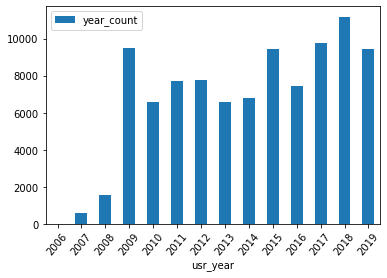

In [33]:
plt.figure(figsize=[40, 45]);
o.plot(x="usr_year", y="year_count", kind="bar", rot=50, fontsize=10);

Very Obvious how tweets in users created in 2019 are signifcally higher than other years

In [37]:
users_tweeted_2020 = tweet_df.groupby(['user.id_str','tweet_year','usr_year', 'full_text','days', 'hours']).size().reset_index(name='user_id_count')
users_tweeted_2020 = users_tweeted_2020[users_tweeted_2020['usr_year'] == 2019]
users_tweeted_2020

,user.id_str,tweet_year,usr_year,full_text,days,hours,user_id_count
9545,1079918764051750912,2019,2019,And I learned that a man can be a victim of ab...,70,12:03:52.000000000,1
9546,1079921516349812737,2019,2019,@aqkentangrebus @steurbuck anj amber heard,1,16:02:21.000000000,1
9547,1079960349204463616,2019,2019,i feel so awful i never saw all this evidence ...,70,17:03:42.000000000,1
9548,1079969330891317250,2019,2019,HAHAHAHA ! I'm sure she did!! She can rake him...,101,08:38:10.000000000,1
9549,1079969330891317250,2019,2019,Hopefully someone gets a hold of hers!!!!!\n\n...,309,16:11:20.000000000,1
...,...,...,...,...,...,...,...
21504,1206617319578800134,2019,2019,@nonunnun @TopDepp @ACLU @UNHumanRights @sams_...,3,10:57:10.000000000,1
21507,1206995622353670144,2019,2019,"la atención, es más, le encanta serlo.\nSu pod...",0,03:29:54.000000000,1
21508,1207283811429560322,2019,2019,Amber Heard surpreende fãs com bebê #AmberHear...,2,07:12:15.000000000,1
21509,1207560875013476353,2019,2019,Amber Heard aturde a los fanáticos con un bebé...,1,12:49:30.000000000,1


In [38]:
users_tweeted_same_day = tweet_df.groupby(['user.id_str', 'days']).size().reset_index(name='user_id_count')
users_tweeted_same_day = users_tweeted_same_day[users_tweeted_same_day['days'] <=1]
users_tweeted_same_day = users_tweeted_same_day.sort_values(["days"], ascending=True)
print("Saved that in a DF")
users_tweeted_same_day

Saved that in a DF


,user.id_str,days,user_id_count
13009,1211556828175167488,0,1
10027,1116367133821128704,0,1
10028,1116372440236605441,0,1
10097,1117476480181837824,0,1
10098,1117482724300873728,0,1
...,...,...,...
12992,1207560875013476353,1,1
9637,1112756109981421568,1,2
9593,1111630131200749569,1,1
10766,1131663866432299008,1,14


In [39]:
tweets_day = tweet_df.groupby('tweet_date').size().reset_index(name='date_count')
tweets_day = tweets_day.sort_values(["date_count"], ascending=False)
print("Saved that in a DF")
tweets_day

Saved that in a DF


,tweet_date,date_count
70,2019-03-12,5979
71,2019-03-13,5361
142,2019-05-23,1924
72,2019-03-14,1912
101,2019-04-12,1895
...,...,...
56,2019-02-26,50
55,2019-02-25,49
54,2019-02-24,49
58,2019-02-28,44


In [40]:
tweets_day_list = set(list(tweets_day.tweet_date))

In [41]:
full_data_dates  = tweet_df[tweet_df['tweet_date'].isin(tweets_day_list)]
full_data_dates

,id_str,full_text,user.id_str,user.screen_name,user.name,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,...,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
0,1106635065952489472,LONDON FIELDS Official Trailer (2018) | Amber ...,1106481000438210561,Noor78299474,Noor,i am happy girl --i like an thinks,http://pbs.twimg.com/profile_images/1111231146...,https://pbs.twimg.com/profile_banners/11064810...,NaN,315,...,0,10:12:12.000000000,2019-03-15,19:15:34,2019-03-15,09:03:22,2019,March,2019,March
1,1120913280380354560,@ahearddaily or right so your amber heard I do...,1120773611621687297,neilthomaslaff1,neilthomaslafferty,NaN,http://pbs.twimg.com/profile_images/1120774020...,NaN,NaN,84,...,0,09:15:00.000000000,2019-04-24,04:52:06,2019-04-23,19:37:06,2019,April,2019,April
2,1106345401399959552,"Amber Heard. Outspoken Atheist, Vegetarian, an...",1106321691418910720,ZoeyReport,Zoey 🦋,ever since my doctor told me sugar is bad for ...,http://pbs.twimg.com/profile_images/1184968474...,https://pbs.twimg.com/profile_banners/11063216...,NaN,266,...,0,01:34:13.000000000,2019-03-15,00:04:33,2019-03-14,22:30:20,2019,March,2019,March
3,1091841578262515713,@jhonpelukon Ámber. Heard,1091494601574305792,Drakaris10,Drakaris,NaN,http://pbs.twimg.com/profile_images/1091607690...,NaN,NaN,89,...,0,22:58:46.000000000,2019-02-02,23:31:32,2019-02-02,00:32:46,2019,February,2019,February
4,1092099474921381893,@jourdayen I like THE INFORMERS pretty well ac...,1091867617814441984,Nowhere22549561,NowhereMan,Licensed Clinical Social Worker\nHeavy duty fi...,http://pbs.twimg.com/profile_images/1091868213...,NaN,NaN,974,...,0,15:21:19.000000000,2019-02-03,16:36:19,2019-02-03,01:15:00,2019,February,2019,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94341,1200059738018525185,Queen Amber...\nGlamour Mexico December 2018: ...,837975641291128832,AlexRumlexa,Alex rumlexa,NaN,http://pbs.twimg.com/profile_images/8684154963...,https://pbs.twimg.com/profile_banners/83797564...,NaN,44794,...,999,03:52:56.000000000,2019-11-28,14:31:52,2017-03-04,10:38:56,2019,November,2017,March
94342,1105725516840124418,@karrolmay So there is restricting? \n\nWhen h...,743687462585696256,theonlyoselu,oselu,Fuck a bio 🙏🏿. Click on my gumroad Gee.\n\n( ...,http://pbs.twimg.com/profile_images/1384963313...,https://pbs.twimg.com/profile_banners/74368746...,https://t.co/wj7UREZnSO,30149,...,999,00:49:59.000000000,2019-03-13,07:01:21,2016-06-17,06:11:22,2019,March,2016,June
94343,1144292102781542400,Johnny Depp and Amber Heard Going to Trial in ...,782060525966413825,source411,bling pipe✨🌊🏄‍♀️✨,Water lover Designer of cool and pretty things...,http://pbs.twimg.com/profile_images/1323790868...,https://pbs.twimg.com/profile_banners/78206052...,NaN,37105,...,999,13:38:57.000000000,2019-06-27,17:11:11,2016-10-01,03:32:14,2019,June,2016,October
94344,1105726292899581952,I am waiting for think pieces from women on th...,743687462585696256,theonlyoselu,oselu,Fuck a bio 🙏🏿. Click on my gumroad Gee.\n\n( ...,http://pbs.twimg.com/profile_images/1384963313...,https://pbs.twimg.com/profile_banners/74368746...,https://t.co/wj7UREZnSO,30149,...,999,00:53:04.000000000,2019-03-13,07:04:26,2016-06-17,06:11:22,2019,March,2016,June


In [44]:
print('trendy dates')
trendy_dates = tweets_day[tweets_day.date_count >=1000]
trendy_dates

trendy dates


,tweet_date,date_count
70,2019-03-12,5979
71,2019-03-13,5361
142,2019-05-23,1924
72,2019-03-14,1912
101,2019-04-12,1895
60,2019-03-02,1539
6,2019-01-07,1278
140,2019-05-21,1176
143,2019-05-24,1129
61,2019-03-03,1018


<Figure size 2880x3240 with 0 Axes>

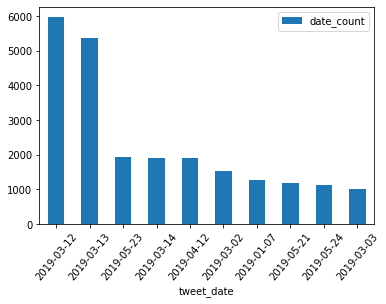

In [45]:
plt.figure(figsize=[40, 45]);
trendy_dates.plot(x="tweet_date", y="date_count", kind="bar", rot=50, fontsize=10);

In [46]:
trend_dates = set(list(trendy_dates.tweet_date))

In [47]:
full_data_trendy_dates  = tweet_df[tweet_df['tweet_date'].isin(trend_dates)]

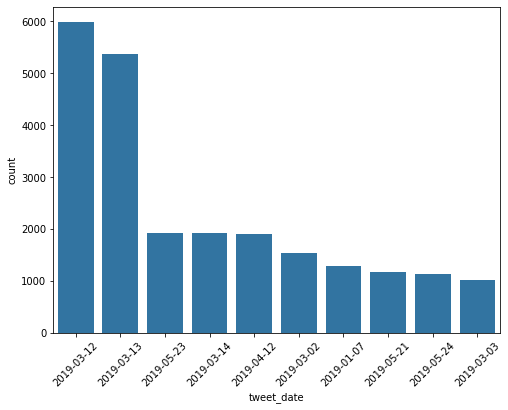

In [48]:
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = full_data_trendy_dates['tweet_date'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=full_data_trendy_dates, x='tweet_date', color=base_color, order=freq.index);
plt.xticks(rotation=45);

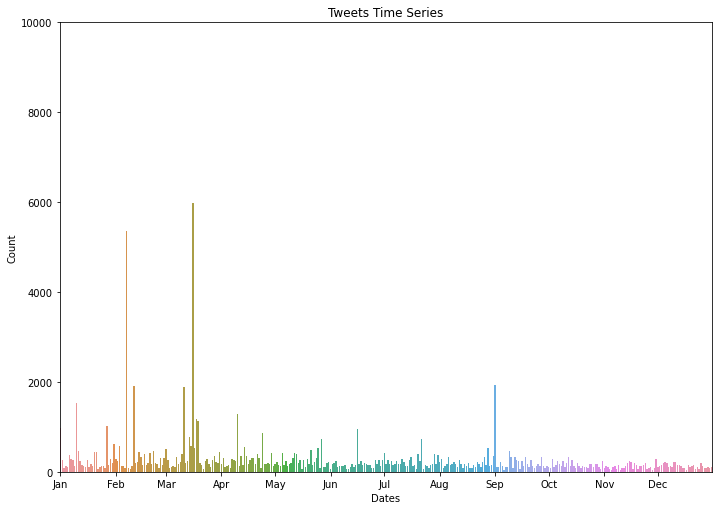

In [50]:
import matplotlib.dates as mdates
import seaborn as snb

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = 'tweet_date', data = full_data_dates)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Dates')
plt.ylim(0,10000)
plt.ylabel('Count')
plt.title('Tweets Time Series')
plt.show()

In [51]:
freq_usrs = tweet_df.groupby('user.id_str').size().reset_index(name='id_count')
freq_usrs = freq_usrs[freq_usrs["id_count"] > 1]
freq_usrs = freq_usrs.sort_values(["id_count"], ascending=False)
print("Saved that in a DF")
freq_usrs

Saved that in a DF


,user.id_str,id_count
22201,4583281223,1921
21313,4194755003,1616
3170,1088984209,1135
4013,1110053201775128586,1102
4081,1112756109981421568,940
...,...,...
18937,3409267013,2
18946,34119202,2
18948,341221151,2
18949,34122510,2


# let's check the distribution for different features to visualize them correctly

A:\Programming\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


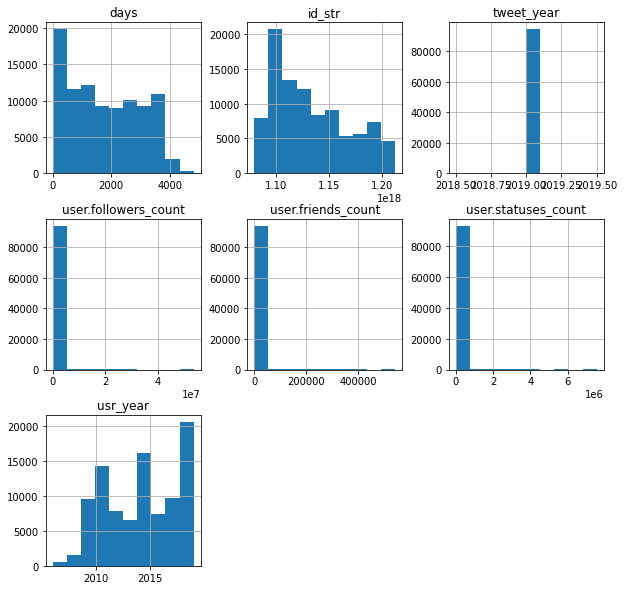

In [52]:
tweet_df.hist(figsize=(10,10));

# checking the distribution of the days

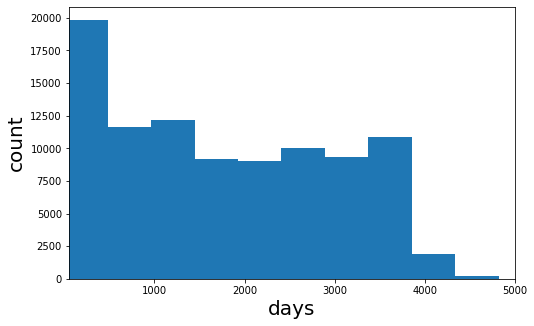

In [53]:
plt.figure(figsize=[8, 5])
plt.hist(data = tweet_df, x = 'days')
plt.xlabel('days', fontsize=20)
plt.xlim(50,5000)
plt.ylabel('count', fontsize=20)
plt.show();

users tweeted in less than 24 hours after creation showing ubnormal count!

# usr creation counts in various years¶


In [55]:
tweet_df.usr_year.value_counts()

2018    11180
2017     9757
2009     9512
2019     9426
2015     9425
2012     7785
2011     7712
2016     7454
2014     6789
2013     6587
2010     6569
2008     1541
2007      605
2006        4
Name: usr_year, dtype: int64

In [56]:
tweet_df.groupby("usr_year")["usr_month"].value_counts()

usr_year  usr_month
2006      November       2
          December       1
          October        1
2007      November     249
          August        82
                      ... 
2019      July         264
          November     237
          October      217
          August       193
          December      65
Name: usr_month, Length: 159, dtype: int64

In [57]:
tweet_df.groupby("usr_year")["usr_month"].value_counts()

usr_year  usr_month
2006      November       2
          December       1
          October        1
2007      November     249
          August        82
                      ... 
2019      July         264
          November     237
          October      217
          August       193
          December      65
Name: usr_month, Length: 159, dtype: int64

# Let's explore more

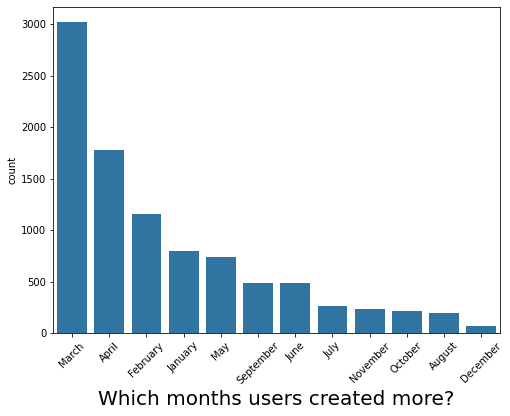

In [60]:
we = tweet_df[tweet_df['usr_year'] == 2019]
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = filtrd_df['usr_month'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=we, x='usr_month', color=base_color, order=freq.index);
plt.xticks(rotation=45);
plt.xlabel('Which months users created more?', fontsize=20);

seems that March & April have more usrs created

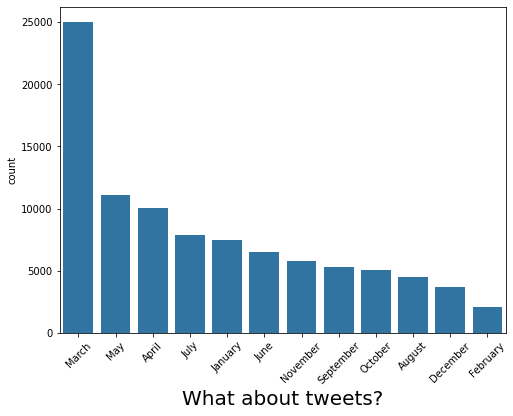

In [61]:
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = tweet_df['tweet_month'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=tweet_df, x='tweet_month', color=base_color, order=freq.index);
plt.xticks(rotation=45);
plt.xlabel('What about tweets?', fontsize=20);

March & April interesting matching .. must have some events

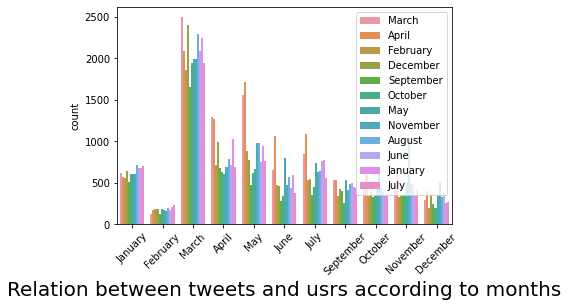

In [93]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','September','October','November','December']
sb.countplot(data = tweet_df, x='tweet_month', order=month_order, hue='usr_month')
plt.xticks(rotation=45);
plt.legend(loc='upper right')
plt.xlabel('Relation between tweets and usrs according to months', fontsize=20);

Some months have common increase in usrs created and tweets tweeted by them .. sure for a reason

In [63]:
## making a cutting function
def cutting(col_name):    
    return pd.cut(tweet_df[col_name], bins=4, labels=['very low','low', 'medium','high'])
tweet_df['cut_days']=cutting('days')

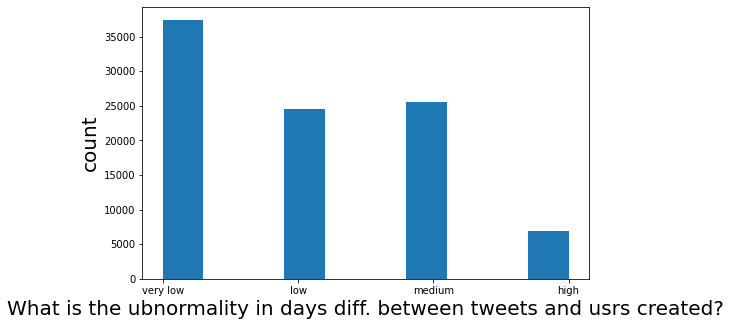

In [64]:
plt.figure(figsize=[8, 5])
plt.hist(data = tweet_df, x = 'cut_days')
plt.xlabel('cut_days', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.xlabel('What is the ubnormality in days diff. between tweets and usrs created?', fontsize=20);
plt.show();


users created and tweeted imm.after creation is the most common feature!

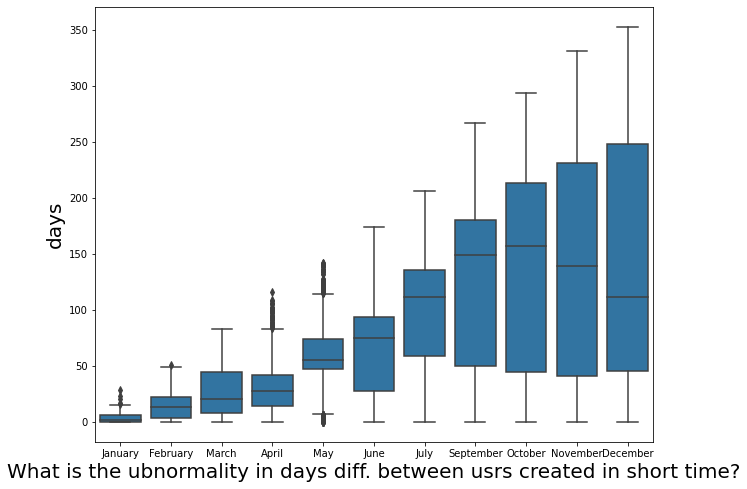

In [65]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','September','October','November','December']
plt.figure(figsize=[10, 8])
sb.boxplot(data=we, x='tweet_month', y='days',order=month_order, color=base_color);
plt.xlabel('tweet_month', fontsize=20);
plt.ylabel('days', fontsize=20);
plt.xlabel('What is the ubnormality in days diff. between usrs created in short time?', fontsize=20);


in Jan., Feb. the days diff is less than one day more than other months and Mar., may., jul. the days diff is also in a very short period of time than rest of the months, This is for tweet_months

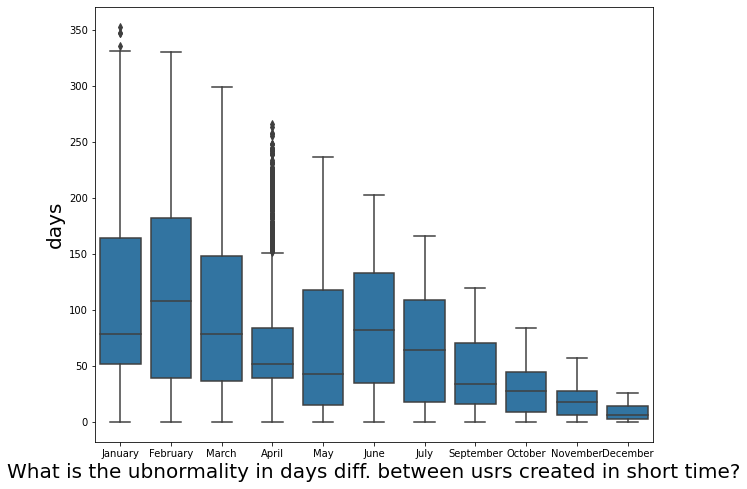

In [67]:
plt.figure(figsize=[10, 8])
sb.boxplot(data=we, x='usr_month', y='days',order=month_order, color=base_color);
plt.xlabel('usr_month', fontsize=20);
plt.xlabel('What is the ubnormality in days diff. between usrs created in short time?', fontsize=20);
plt.ylabel('days', fontsize=20);

# scatter plot of days vs. usr_month, with log transform on days y axis

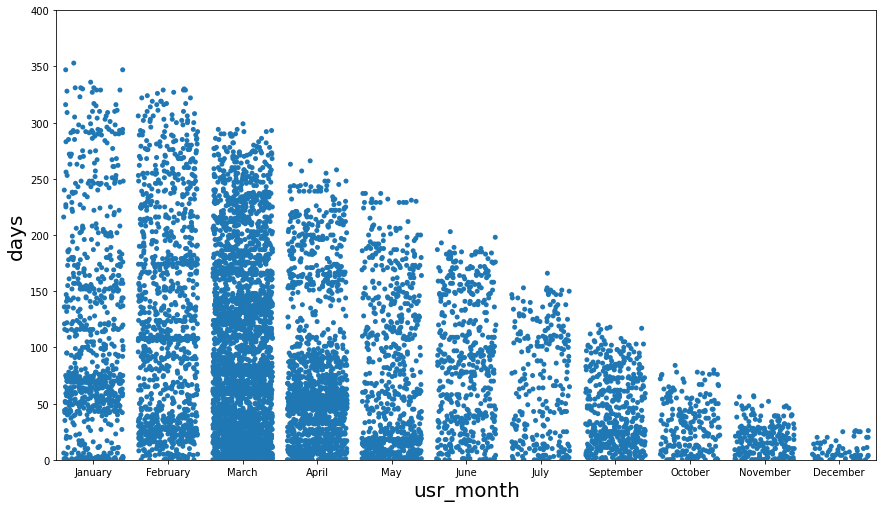

In [68]:

plt.figure(figsize = [14.70, 8.27])
sb.stripplot(data = we, x = 'usr_month', y = 'days', jitter = 0.40, color = base_color, order = month_order)
plt.xlabel('usr_month', fontsize=20)
plt.ylim(0, 400)
plt.ylabel('days', fontsize=20)
plt.show();

In [69]:
clean_df = tweet1
clean_df['tweet_date'] = pd.to_datetime(clean_df['tweet_date'])
clean_df['user_create_date'] = pd.to_datetime(clean_df['user_create_date'])

In [70]:
clean_df[clean_df['usr_year']== 2019]['usr_month'].value_counts()

March        3016
April        1775
February     1153
January       793
May           741
September     489
June          483
July          264
November      237
October       217
August        193
December       65
Name: usr_month, dtype: int64

In [71]:
z = clean_df[clean_df['usr_year']== 2019]
z.shape

(9426, 22)

9426 usrs were created in 2019 only .. by investigating each month seperately must have something in common

# March...

In [72]:
A = clean_df[clean_df['usr_month']== 'March'].sort_values(["days"], ascending=True)
# A[A['days']<=1]
print(A.shape[0])

9789


In [73]:
A['cut_days'] = cutting('days')

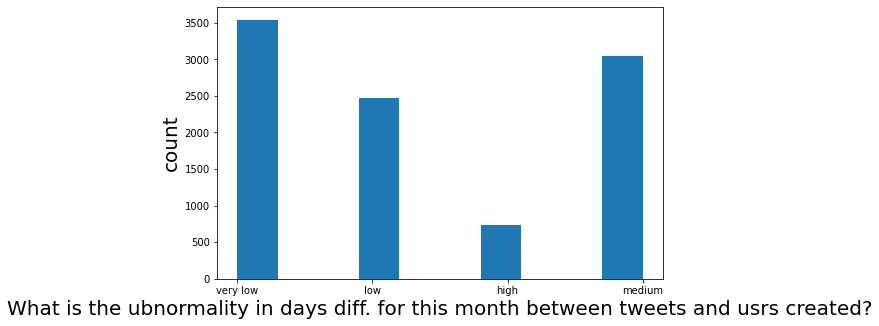

In [74]:
plt.figure(figsize=[8, 5])
plt.hist(data = A, x = 'cut_days')
plt.xlabel('cut_days', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.xlabel('What is the ubnormality in days diff. for this month between tweets and usrs created?', fontsize=20);
plt.show();

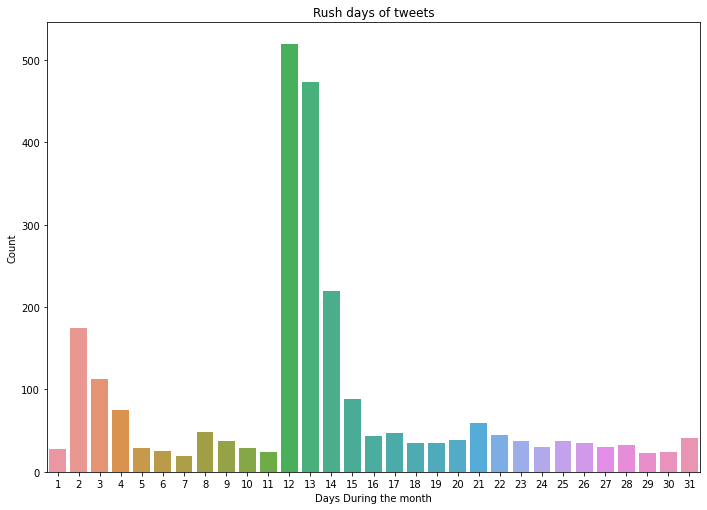

In [76]:
fltrd_A = A[A['tweet_month']== 'March'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_A['tweet_date'].dt.day, data = A)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

In [85]:
A['usr_year'].astype(int)
A['days'] = A['days'].astype(int)

In [86]:
tt = A.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2018]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in 0-10 days Age:', (tt[tt["days"] <=10].shape[0]))
print('no. of tweet from 2018 users:', (tt.shape[0]))
tt

no. of tweet in 0-10 days Age: 0
no. of tweet from 2018 users: 409


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
6772,980162121886568448,January,2018,"@ERRebeENE @Desahogada @WarnerBrosSpain Tío, m...",277,04:03:54.000000000,2019-01-02,March,1
6724,979159611524628480,January,2018,Leaked depositions shed light on Johnny Depp-A...,280,16:21:52.000000000,2019-01-03,March,1
6691,978416564990038019,January,2018,"Amber Heard nunca critiquei, rainha da minha e...",282,00:21:14.000000000,2019-01-03,March,1
6684,978238855089238016,January,2018,ok not to be horny on main but amber heard can...,283,22:37:16.000000000,2019-01-04,March,1
6735,979331910777282560,January,2018,Amber Heard en lo mejor de la alfombra roja de...,283,13:13:15.000000000,2019-01-07,March,1
...,...,...,...,...,...,...,...,...,...
6373,969432275715698688,November,2018,@_trudiegraham Question - if Depp is able to p...,637,17:38:13.000000000,2019-11-29,March,1
6475,972633819676315648,December,2018,&gt;&gt;&gt;&gt;&gt;&gt; SE LIGA &lt;&lt;&lt;&...,650,23:59:18.000000000,2019-12-22,March,1
6386,969988408557776896,December,2018,@TheFigen After that he loses his girl (Amber ...,651,08:05:02.000000000,2019-12-15,March,1
6454,972373748715343872,December,2018,@jediharleystark @AnnaOmmen @MargotRobbie @Gal...,654,03:03:49.000000000,2019-12-24,March,1


In [87]:
df = tweet_df
df.head()

,id_str,full_text,user.id_str,user.screen_name,user.name,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,...,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month,cut_days
0,1106635065952489472,LONDON FIELDS Official Trailer (2018) | Amber ...,1106481000438210561,Noor78299474,Noor,i am happy girl --i like an thinks,http://pbs.twimg.com/profile_images/1111231146...,https://pbs.twimg.com/profile_banners/11064810...,NaN,315,...,10:12:12.000000000,2019-03-15,19:15:34,2019-03-15,09:03:22,2019,March,2019,March,very low
1,1120913280380354560,@ahearddaily or right so your amber heard I do...,1120773611621687297,neilthomaslaff1,neilthomaslafferty,NaN,http://pbs.twimg.com/profile_images/1120774020...,NaN,NaN,84,...,09:15:00.000000000,2019-04-24,04:52:06,2019-04-23,19:37:06,2019,April,2019,April,very low
2,1106345401399959552,"Amber Heard. Outspoken Atheist, Vegetarian, an...",1106321691418910720,ZoeyReport,Zoey 🦋,ever since my doctor told me sugar is bad for ...,http://pbs.twimg.com/profile_images/1184968474...,https://pbs.twimg.com/profile_banners/11063216...,NaN,266,...,01:34:13.000000000,2019-03-15,00:04:33,2019-03-14,22:30:20,2019,March,2019,March,very low
3,1091841578262515713,@jhonpelukon Ámber. Heard,1091494601574305792,Drakaris10,Drakaris,NaN,http://pbs.twimg.com/profile_images/1091607690...,NaN,NaN,89,...,22:58:46.000000000,2019-02-02,23:31:32,2019-02-02,00:32:46,2019,February,2019,February,very low
4,1092099474921381893,@jourdayen I like THE INFORMERS pretty well ac...,1091867617814441984,Nowhere22549561,NowhereMan,Licensed Clinical Social Worker\nHeavy duty fi...,http://pbs.twimg.com/profile_images/1091868213...,NaN,NaN,974,...,15:21:19.000000000,2019-02-03,16:36:19,2019-02-03,01:15:00,2019,February,2019,February,very low


In [88]:
df['tweet_date'] = pd.to_datetime(df['tweet_date'])
df['tweet_time'] = pd.to_datetime(df['tweet_time'])
df['user_create_date'] = pd.to_datetime(df['user_create_date'])
df['user_create_time'] = pd.to_datetime(df['user_create_time'])

# Investigation on users Created Over Time

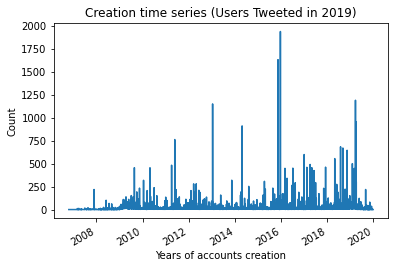

In [89]:
df['user_create_date'].value_counts().plot()
plt.xlabel('Years of accounts creation')
plt.ylabel('Count')
plt.title('Creation time series (Users Tweeted in 2019)');

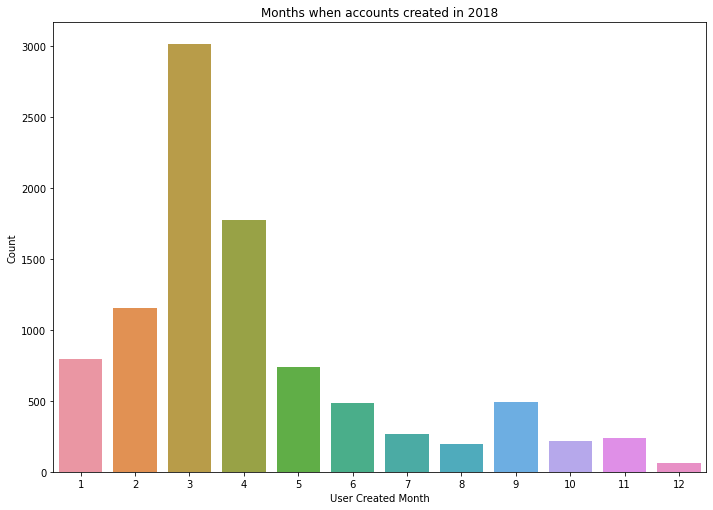

In [91]:
users_cre_18 = df[df['user_create_date'].dt.year == 2019]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = users_cre_18['user_create_date'].dt.month, data = df)
plt.xlabel('User Created Month')
plt.ylabel('Count')
plt.title('Months when accounts created in 2018')
plt.show()

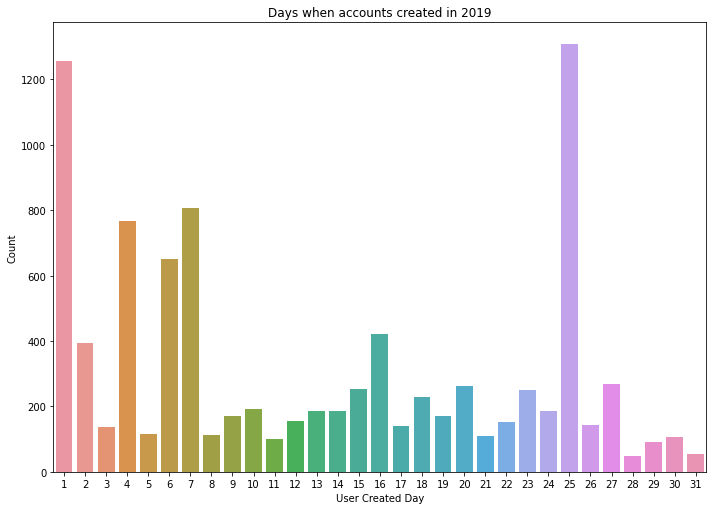

In [92]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = users_cre_18['user_create_date'].dt.day, data = df)
plt.xlabel('User Created Day')
plt.ylabel('Count')
plt.title('Days when accounts created in 2019')

plt.show()